In [7]:
# Look at #unique taxa/seqs by sample, replicate group, and region

In [8]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#For illustrator import:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [9]:
#Functions

#Raw Read Numbers
def make_rawread(infile):
    #infile = OTU_table_taxa_all.txt
    df = pd.read_csv(infile, sep='\t')
    df.rename(columns={'DUP_ID':'OTU'}, inplace=True)
    df.drop('taxonomy', axis=1, inplace=True)
    df.drop('repseq', axis=1, inplace=True)
    df.set_index('OTU', inplace=True)
    return df
    
#metadata handling and sample order
def make_metadata(infile):
    df = pd.read_csv(infile)
    #make all column names with underscore
    columns_l = list(df)
    columns_l = [c.replace('-', '_') for c in columns_l]
    df.columns = columns_l
    #extract site name
    df['site'] = df['sample_name'].str.extract('([a-zA-Z0-9]+)')
    df_full = df[:]
    #add in some missing location data
    df_full.loc[df_full['site']=='UC5', 'dec_lat'] = 32
    df_full.loc[df_full['site']=='UC5', 'dec_long'] = '.118.17'
    df_full['dec_long'] = df_full['dec_long'].str.replace('^\.','-')
    df_full.set_index('sample_name', inplace=True)
    df= df[['Description', 'Treatment', 'sample_name']]
    df['comb'] = df['Description']+'_'+df['Treatment']+'_'+df['sample_name']
    df['site_Order']=df['sample_name'].str.replace('GOC2a', '16').str.replace('GOC2b', '17').str.replace('NTC', '0')
    df['site_Order']=df['site_Order'].str.extract('(\d+)')
    df.set_index('sample_name', inplace=True)
    df['site_Order']= df['site_Order'].astype(int)
    df.sort_values('site_Order', ascending=True, inplace=True)
    return df_full, df

#DESEQ Numbers
def make_deseq(infile):
    df = pd.read_csv(infile, sep=',')
    df.rename(columns={'Unnamed: 0':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    return df

#Rarefied Read Numbers (From R script); make compositional
def make_rarereads_comp(infile):
    df= pd.read_csv(infile, sep=',')
    df.rename(columns={'Unnamed: 0':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    df=df.T
    df['Total']=df.sum(axis=1)
    tot_reads = df['Total'].tolist()
    tot_reads = set(tot_reads)
    print('Rarefied read count:', tot_reads)
    tot_reads = df['Total'].tolist()[0]
    df = df/tot_reads *100
    df.drop('Total', axis=1, inplace=True)
    df=df.T
    return df

def make_rarereads(infile):
    df= pd.read_csv(infile, sep=',')
    df.rename(columns={'Unnamed: 0':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    return df

#Taxa table
def make_taxa(infile):
    #infile = OTU_table_taxa_all.txt
    df = pd.read_csv(infile, sep='\t')
    df.rename(columns={'DUP_ID':'OTU'}, inplace=True)
    df = df[['taxonomy', 'OTU']]
    df.set_index('OTU', inplace=True)
    df['Kingdom']=df['taxonomy'].str.split("\'").str[1]
    df['Phylum']=df['taxonomy'].str.split("\'").str[3]
    df['Class']=df['taxonomy'].str.split("\'").str[5]
    df['Order']=df['taxonomy'].str.split("\'").str[7]
    df['Family']=df['taxonomy'].str.split("\'").str[9]
    df['Genus']=df['taxonomy'].str.split("\'").str[11]
    df['Species']=df['taxonomy'].str.split("\'").str[13]
    df=df.drop('taxonomy', axis=1)
    return df

#Filtered Taxa table
def make_Ftaxa(infile):
    df = pd.read_csv(infile, sep=',')
    df.rename(columns={'OTU_ID':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    df=df[df.columns[-7:]]
    return df

#extract sequences
def make_seq(infile):
    #infile = OTU_table_taxa_all.txt
    df = pd.read_csv(infile, sep='\t')
    df.rename(columns={'DUP_ID':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    df=df[['repseq']]
    return df

In [10]:
#COI M6
print('COI')
#OTU_table_taxa_all.txt location
file_loc1 = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/COI/Analysis_20190921_1416/all_lib/Post_Blast_20190925_0914/OTU_table_taxa_all.txt'
#metadata
meta_file = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/COI/Analysis_20190921_1416/GOC_20190921_1416_COI_analysis_metadata.csv'

#DESEQ data
#file2 = '/Users/kpitz/Projects/Gulf_of_California/Deseq/COI_GOC_DEseq_122117.csv'
#rarefied data
file3 = '/Users/kpitz/Projects/MBON/Rarefied_Data_unmerged/GOC_COI_OTU_Table_092619_M6.csv'
#Filtered OTU table
file4 ='/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/COI/Analysis_20190921_1416/all_lib/Filtered_OTU_taxa_table_all.csv'

raw_COI = make_rawread(file_loc1)
meta_COI, samp_lim_COI = make_metadata(meta_file)
#deseq_COI = make_deseq(file2)
rare_COI = make_rarereads(file3)
rare_comp_COI = make_rarereads_comp(file3)
taxa_COI = make_taxa(file_loc1)
Ftaxa_COI = make_Ftaxa(file4)
seq_COI = make_seq(file_loc1)

#18S_M6
print('18S')
#OTU_table_taxa_all.txt location
file_loc1 = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/18S/Analysis_20190924_1129/all_lib/Post_Blast_20190930_1343/OTU_table_taxa_all.txt'
#metadata
meta_file = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/18S/Analysis_20190924_1129/GOC_18S_Metadata.csv'
#DESEQ data
#file2 = '/Users/kpitz/Projects/Gulf_of_California/Deseq/18S_GOC_DEseq_122117.csv'
#rarefied data
file3 = '/Users/kpitz/Projects/MBON/Rarefied_Data_unmerged/GOC_18S_OTU_Table_100119_M6.csv'
#Filtered OTU table
file4 = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/18S/Analysis_20190924_1129/all_lib/Filtered_OTU_taxa_table_all.csv'


raw_18S = make_rawread(file_loc1)
meta_18S, samp_lim_18S = make_metadata(meta_file)
#deseq_18S = make_deseq(file2)
rare_18S = make_rarereads(file3)
rare_comp_18S = make_rarereads_comp(file3)
taxa_18S = make_taxa(file_loc1)
Ftaxa_18S = make_Ftaxa(file4)
seq_18S = make_seq(file_loc1)


#Directory for saving Figures
plot_dir = '/Users/kpitz/Projects/Gulf_of_California/GOC_18S_COI_Combined_Cutadapt/'
plot_name = 'GOC_18SCOI_'
Plot_str = plot_dir + plot_name
print(Plot_str)

#Use to change the name of the databases
name1 = 'GOC_18SCOI_'

COI
Rarefied read count: {129363}
18S
Rarefied read count: {28676}
/Users/kpitz/Projects/Gulf_of_California/GOC_18S_COI_Combined_Cutadapt/GOC_18SCOI_


In [11]:
#Limit by Sequence Length Data
#COI
files = ['/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_COI_seq_table_092519.csv',
         '/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_COI_otu_table_092519.csv',
         '/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_COI_taxa_table_092519.csv']
#dfs = [seq_COI_filt, raw_COI_filt, Ftaxa_COI_filt]
df = pd.read_csv(files[0])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
seq_COI_filt = df.copy()

df = pd.read_csv(files[1])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
raw_COI_filt = df.copy()

df = pd.read_csv(files[2])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
Ftaxa_COI_filt = df.copy()

raw_COI_filt.head()

#import metadata
meta_file ='/Users/kpitz/Projects/Gulf_of_California/Combined_PCTD_Metadata_043019.csv'
df= pd.read_csv(meta_file)
df=df.sort_values(['order'])
df.set_index('sample_ID', inplace=True)
print(list(df))

meta_COI_PCTD = df.copy()
meta_COI_PCTD.head()


#18S
files = ['/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_18S_seq_table_100119.csv',
         '/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_18S_otu_table_100119.csv',
         '/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_18S_taxa_table_100119.csv']
#dfs = [seq_18S_filt, raw_18S_filt, Ftaxa_18S_filt]
df = pd.read_csv(files[0])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
seq_18S_filt = df.copy()

df = pd.read_csv(files[1])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
raw_18S_filt = df.copy()

df = pd.read_csv(files[2])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
Ftaxa_18S_filt = df.copy()
df.head()

['order', 'tag_sequence', 'primer_sequence_F', 'primer_sequence_R', 'library_tag_combo', 'library', 'sample_type', 'locus', 'tag_number', 'R1', 'R2', 'Treatment', 'Time_of_Day', 'Description', 'Description_3', 'site', 'SEQ', 'BOTTLE', 'DEPTH', 'CRUISE', 'PLATFORM', 'DEC_LAT', 'DEC_LONG', 'TMP', 'SAL', 'CHL_GFF', 'PRESSURE', 'NO3', 'OXY_ML', 'RDEP', 'TRANSMISS', 'SIG_T', 'FLUOR', 'DATE_TIME', 'cruise', 'SEQAvg_dg', 'AvgOfTMP', 'StDevOfTMP', 'CountOfTMP', 'AvgOfSAL1', 'StDevOfSAL', 'CountOfSAL', 'AvgOfCHLA', 'StDevOfCHLA', 'CountOfCHLA', 'AvgOfOXY_ML1', 'CountOfOXY_ML1', 'CountOfOXY_ML', 'AvgOfTRANSMISS', 'StDevOfTRANSMISS', 'CountOfTRANSMISS', 'AvgOfSIGMA_THETA', 'StDevOfSIGMA_THETA', 'CountOfSIGMA_THETA']


,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU,,,,,,,
OTU_1,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Calanidae,Calanus,s_
OTU_10,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Metridinidae,Metridia,Metridia lucens
OTU_100,Eukaryota,Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,g_,s_
OTU_100012,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Metridinidae,Metridia,Metridia lucens
OTU_100017,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Calanidae,Calanus,s_


In [12]:
#rarefied datasets
Geller_18S = pd.read_csv('/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/18S_Geller_MGmodified_9Jan19.txt', sep='	')
Geller_18S.set_index('#OTU ID', inplace=True)
Geller_18S
#original 18S before mistake fixed (OTU_67 included and taxonomy wrong- sequences also wrong)
#Geller_18So = pd.read_csv('/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/Incorrect_18S/18S_Geller.txt', sep='	')
#Geller_18So
Geller_COI = pd.read_csv('/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/COI_Geller.txt', sep='	')
Geller_COI.set_index('#OTU ID', inplace=True)
Geller_COI

#non-rarefied datasets
file= '/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/Not_rarefied/MBARI_18S_otu_table_10097_txt.txt'
Geller_18S_nr = pd.read_csv(file, sep='	')
Geller_18S_nr.set_index('#OTU ID', inplace=True)
Geller_18S_nr
file= '/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/Not_rarefied/MBARI_COI_otu_table_10095_txt.txt'
Geller_COI_nr = pd.read_csv(file, sep='	')
Geller_COI_nr.set_index('#OTU ID', inplace=True)
Geller_18S_nr.head()


,CP23_1,CP23,CP23_2,GOC2a,GOC2b,UC10,UC1,UC12,UC13,UC14,UC15,UC2,UC3_1,UC3,UC3_2,UC4,UC5,UC6,UC7,UC9
#OTU ID,,,,,,,,,,,,,,,,,,,,
OTU_6,19231,22170,14287,34957,22575,68966,6533,28481,32333,14665,34219,3970,28208,41001,39997,13079,2023,373,10606,1568
OTU_28,16679,18639,13582,1344,1294,5722,25575,26363,29378,14098,32274,21545,20676,23539,31666,16134,14833,35070,25123,24619
OTU_89,10753,11618,4602,22,0,1691,0,1196,223,1298,725,3,0,0,0,3,0,0,0,1
OTU_34,7817,9214,2665,1670,1346,306,27,2595,1881,2881,2781,1955,189,299,68,19,17,1011,36,40
OTU_168,3404,3930,1326,490,244,0,0,1,0,773,100,0,0,0,0,0,0,0,0,0


In [13]:
#Make compositional rarefied OTU table and taxa table
# Format Geller Data to get OTU table / taxa table
print(list(Ftaxa_COI))
#levels = list(Ftaxa_COI)
levels =['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = Geller_COI.copy()
df['Species'] = df['Genus'] + ' ' + df['Species']
df.fillna('no hits', inplace=True)
df['Class']=df['Class'].str.replace('Maxillopoda', 'Hexanauplia')
#df.set_index('#OTU ID', inplace=True)

df[levels]=df[levels].astype(str)
#get rid of white space
for i in levels:
    df[i]=df[i].str.strip()

cols = list(df)
for i in range(len(cols)):
    cols[i] = cols[i].replace('.','_')
df.columns = cols

Geller_COI_taxa = df[levels]

Geller_COI_otu = df[['CP23_1', 'CP23', 'CP23_2', 'GOC2a', 'GOC2b', 'UC10', 'UC1', 'UC12', 'UC13', 
                     'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']]
print(list(df))
#This is rarefied data. Create a percent rarefied data OTU table
df = Geller_COI_otu.copy()
df=df.T
cols = list(df)
df['tot']=df.sum(axis=1)
for i in cols:
    df[i]=df[i]/df['tot'] *100
df.drop('tot', axis=1, inplace=True)
df=df.T
Geller_COI_otu_comp = df.copy()
df

['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
['CP23_1', 'CP23_2', 'CP23', 'GOC2a', 'GOC2b', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'UC1', 'UC2', 'UC3_1', 'UC3_2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'Sequence', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


,CP23_1,CP23,CP23_2,GOC2a,GOC2b,UC10,UC1,UC12,UC13,UC14,UC15,UC2,UC3_1,UC3,UC3_2,UC4,UC5,UC6,UC7,UC9
#OTU ID,,,,,,,,,,,,,,,,,,,,
OTU_1,0.212719,0.245167,0.060691,9.074794,7.174748,0.189884,0.000000,1.415120,1.799095,1.382671,4.411208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000601,0.000000
OTU_10,1.819526,1.790682,1.089432,0.116575,0.146620,2.282219,0.000000,6.706046,8.487715,5.893629,14.037027,0.000000,0.000000,0.000000,0.015623,0.001803,0.000000,0.016224,0.000000,0.243965
OTU_100,0.183275,0.233750,0.144817,0.036655,0.000000,0.182674,0.000000,0.007812,0.198297,0.003005,0.044467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1000,0.000000,0.000000,0.000000,0.004807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1001,0.000000,0.000000,0.000000,0.000000,0.002404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1003,0.000000,0.000000,0.000000,0.096144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1004,0.000000,0.000000,0.000000,0.009014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
#Make compositional rarefied OTU table and taxa table
#18S
# Format Geller Data to get OTU table / taxa table
print(list(Ftaxa_18S))
#levels = list(Ftaxa_18S)
levels =['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = Geller_18S.copy()
df['Species'] = df['Genus'] + ' ' + df['Species']
df.fillna('no hits', inplace=True)
df['Class']=df['Class'].str.replace('Maxillopoda', 'Hexanauplia')
#df.set_index('#OTU ID', inplace=True)

df[levels]=df[levels].astype(str)
#get rid of white space
for i in levels:
    df[i]=df[i].str.strip()

cols = list(df)
for i in range(len(cols)):
    cols[i] = cols[i].replace('.','_')
df.columns = cols

Geller_18S_taxa = df[levels]

Geller_18S_otu = df[['CP23_1', 'CP23', 'CP23_2', 'GOC2a',  'UC10', 'UC1', 'UC12', 'UC13', 
                     'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']]
print(list(df))
#This is rarefied data. Create a percent rarefied data OTU table
df = Geller_18S_otu.copy()
df=df.T
cols = list(df)
df['tot']=df.sum(axis=1)
for i in cols:
    df[i]=df[i]/df['tot'] *100
df.drop('tot', axis=1, inplace=True)
df=df.T
Geller_18S_otu_comp = df.copy()
df

['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
['CP23_1', 'CP23', 'CP23_2', 'GOC2a', 'UC10', 'UC1', 'UC12', 'UC13', 'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'Sequence', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'OrganismDescriptionFromGenBank']


,CP23_1,CP23,CP23_2,GOC2a,UC10,UC1,UC12,UC13,UC14,UC15,UC2,UC3_1,UC3,UC3_2,UC4,UC5,UC6,UC7,UC9
#OTU ID,,,,,,,,,,,,,,,,,,,
OTU_1,0.001173,0.001173,0.000000,0.000000,0.068012,0.075048,0.000000,0.000000,0.001173,0.000000,0.024625,0.015244,0.025798,0.008208,0.025798,0.900573,0.005863,0.304882,0.001173
OTU_10,0.024625,0.026970,0.041042,0.001173,0.000000,0.000000,0.260322,0.004690,0.000000,0.007036,0.003518,0.792692,0.722335,3.153180,0.024625,0.021107,0.724680,0.725853,0.000000
OTU_100,0.001173,0.000000,0.000000,0.002345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002345,0.002345,0.002345,0.290810,0.000000,0.004690,0.001173,0.000000
OTU_101,0.000000,0.000000,0.000000,0.000000,0.000000,0.003518,0.000000,0.000000,0.000000,0.000000,0.001173,0.002345,0.005863,0.001173,0.000000,0.056286,0.000000,0.022280,0.000000
OTU_102,0.000000,0.001173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003518,0.000000,0.015244,0.018762,0.005863,0.043387,0.017589,0.003518,0.004690,0.000000
OTU_103,5.182988,6.199651,3.483859,0.376412,0.003518,0.000000,0.341233,0.016417,0.300191,3.218846,0.000000,0.002345,0.002345,0.000000,0.001173,0.000000,0.000000,0.000000,0.001173
OTU_104,0.000000,0.000000,0.000000,0.000000,0.001173,0.003518,0.000000,0.000000,0.000000,0.000000,0.002345,0.000000,0.003518,0.002345,0.000000,0.063322,0.000000,0.016417,0.000000
OTU_105,0.000000,0.000000,0.000000,0.001173,0.472567,0.000000,0.016417,0.007036,0.029316,0.003518,0.000000,0.003518,0.004690,0.002345,0.000000,0.090292,0.011726,0.303709,0.000000
OTU_106,0.001173,0.000000,0.001173,0.000000,0.000000,0.144232,0.004690,0.000000,0.000000,0.002345,0.220453,0.140715,0.168858,0.110226,0.007036,0.093810,0.012899,0.077393,0.014071


In [14]:
meta_dat = meta_COI.reset_index()
print(list(meta_dat))
#meta_dat['site']= meta_dat.sample_name.str.split('.').str[:-1].str.join('.')
meta_dat['site_Order']=meta_dat['site'].str.replace('GOC2a', '16').str.replace('GOC2b', '17').str.replace('NTC', '0')
meta_dat['site_Order']=meta_dat['site_Order'].str.extract('(\d+)')
meta_dat['site_Order']=meta_dat['site_Order'].astype(int)
meta_dat= meta_dat.loc[meta_dat['sample_type']=='environmental']
meta_dat.sort_values(['site_Order', 'sample_name'], inplace=True)
meta_dat['sample_name']=meta_dat['sample_name'].str.replace('_COI','')
meta_dat['sample_name']=meta_dat['sample_name'].str.replace('.','_')
meta_dat.set_index('sample_name', inplace=True)

meta_dat.head()

['sample_name', 'order', 'tag_sequence', 'tag_sequence_orig', 'primer_sequence_F', 'primer_sequence_R', 'library_tag_combo', 'library', 'sample_type', 'locus', 'tag_number', 'R1', 'R2', 'Treatment', 'depth', 'dec_lat', 'dec_long', 'fluor', 'tmp', 'sal', 'sigma_theta', 'conduct', 'oxy_ml', 'transmiss', 'Description', 'site']


,order,tag_sequence,tag_sequence_orig,primer_sequence_F,primer_sequence_R,library_tag_combo,library,sample_type,locus,tag_number,...,fluor,tmp,sal,sigma_theta,conduct,oxy_ml,transmiss,Description,site,site_Order
sample_name,,,,,,,,,,,,,,,,,,,,,
UC1,1,TTCTAGCT_AA,TTCTAGCT,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N7_TTCTAGCT,N7,environmental,COI,1,...,0.317525,12.57277917,33.31300833,25.17000417,3.879983208,5.731966667,86.42458333,PCNorth,UC1,1
UC2,2,CCTAGAGT_AA,CCTAGAGT,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N8_CCTAGAGT,N8,environmental,COI,2,...,0.327413043,12.72407391,33.28353913,25.11782174,3.890925304,5.685595652,85.7651913,PCNorth,UC2,2
UC3_1,19,GCGTAAGA_AT,GCGTAAGA,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N9_GCGTAAGA,N9,environmental,COI,19,...,0.351265217,12.57266522,33.42426522,25.25619565,3.891625217,5.249904348,85.76833913,PCNorth,UC3,3
UC3_2,17,TTCTAGCT_AT,TTCTAGCT,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N10_TTCTAGCT,N10,environmental,COI,17,...,0.351265217,12.57266522,33.42426522,25.25619565,3.891625217,5.249904348,85.76833913,PCNorth,UC3,3
UC3,3,GCGTAAGA_AA,GCGTAAGA,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N11_GCGTAAGA,N11,environmental,COI,3,...,0.351265217,12.57266522,33.42426522,25.25619565,3.891625217,5.249904348,85.76833913,PCNorth,UC3,3


In [16]:
#18S
df=raw_18S_filt.copy()
print(len(df.index))
df=df.T
print(len(df.index))
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df= df_a.reset_index()
df = df.join(df_b, on='site_Order')
df = df.join(df_c, on='Description')
df=df.sort_values(['site_Order', 'index'])
df=df.set_index(['Description', 'site_Order', 'index'])
#Index of 100* (#sp A+B)/[#spA+B+#spuniqA + #spuniqB]
df_otu_18S=df.copy()
df

44837
21


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unique_samp  Unique_site  Unique_region
Description site_Order index                                          
PCNorth     1          UC1            2018         2018          10163
            2          UC2            1510         1510          10163
            3          UC3            2420         6600          10163
                       UC3_1          1810         6600          10163
                       UC3_2          2334         6600          10163
EUNorth     4          UC4            1571         1571          13027
            5          UC5            3750         3750          13027
            6          UC6            2565         2565          13027
            7          UC7            2922         2922          13027
            9          UC9            2078         2078          13027
EUSouth     10         UC10           2280         2280          20940
            12         UC12           2318         2318          20940
            13         UC13           2348         2348          20940
            14         UC14           2006         2006          20940
            15         UC15           1648         1648          20940
            16         GOC2a          1583         2110          20940
                       GOC2b           504         2110          20940
            23         CP23           2491         7919          20940
                       CP23_1         3002         7919          20940
                       CP23_2         2342         7919          20940

In [17]:
#by taxa / by phylum
#18S
df=raw_18S_filt.copy()
df=pd.concat([df,Ftaxa_18S_filt], axis=1, join='inner')
levels = list(Ftaxa_18S_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')

df = df.groupby(levels).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df= df_a.reset_index()
df = df.join(df_b, on='site_Order')
df = df.join(df_c, on='Description')
df=df.sort_values(['site_Order', 'index'])
df=df.set_index(['Description', 'site_Order', 'index'])
#Index of 100* (#sp A+B)/[#spA+B+#spuniqA + #spuniqB]
df
df_taxa_18S=df.copy()
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unique_samp  Unique_site  Unique_region
Description site_Order index                                          
PCNorth     1          UC1               3            3             31
            2          UC2              10           10             31
            3          UC3               2           15             31
                       UC3_1             1           15             31
                       UC3_2             4           15             31
EUNorth     4          UC4               5            5             53
            5          UC5               7            7             53
            6          UC6              16           16             53
            7          UC7               9            9             53
            9          UC9               4            4             53
EUSouth     10         UC10              7            7            127
            12         UC12              1            1            127
            13         UC13              7            7            127
            14         UC14              8            8            127
            15         UC15             16           16            127
            16         GOC2a             6            9            127
                       GOC2b             1            9            127
            23         CP23              7           35            127
                       CP23_1            7           35            127
                       CP23_2            4           35            127

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_merged_taxa_unique_Class.pdf


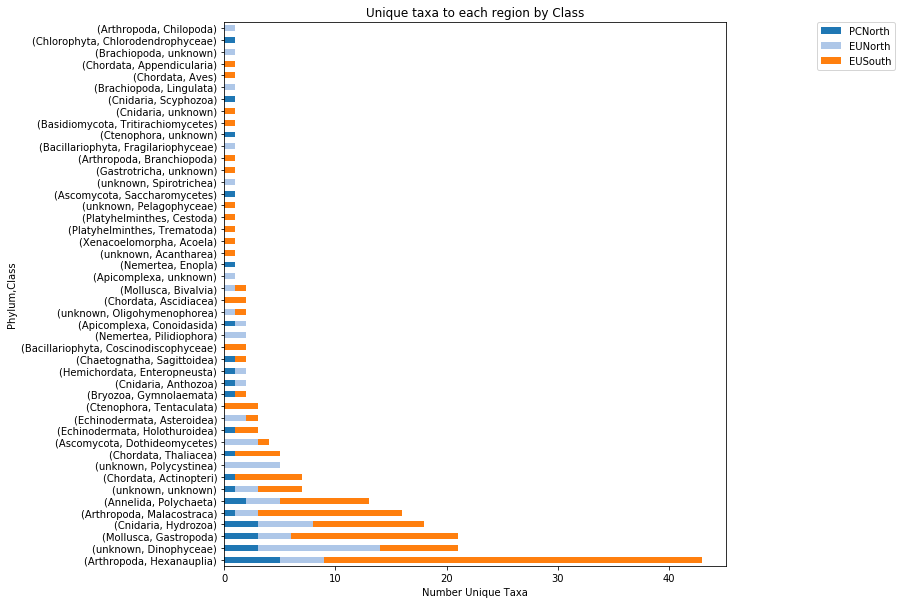

/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_merged_taxa_unique_top20Class_byregion.pdf


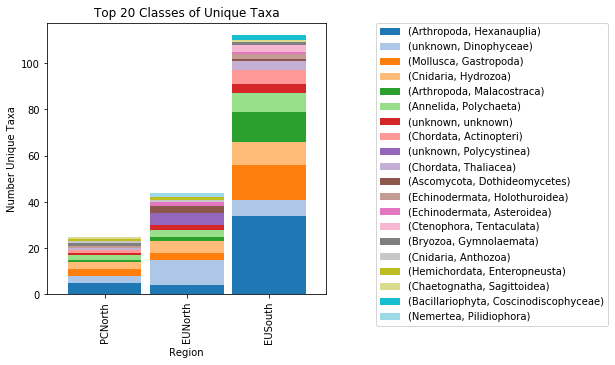

Phylum       Arthropoda     unknown   Mollusca Cnidaria   Arthropoda  \
Class       Hexanauplia Dinophyceae Gastropoda Hydrozoa Malacostraca   
Description                                                            
PCNorth               5           3          3        3            1   
EUNorth               4          11          3        5            2   
EUSouth              34           7         15       10           13   

Phylum        Annelida unknown    Chordata      unknown  Chordata  \
Class       Polychaeta unknown Actinopteri Polycystinea Thaliacea   
Description                                                         
PCNorth              2       1           1            0         1   
EUNorth              3       2           0            5         0   
EUSouth              8       4           6            0         4   

Phylum           Ascomycota Echinodermata             Ctenophora      Bryozoa  \
Class       Dothideomycetes Holothuroidea Asteroidea Tentaculata Gymnolaemata   
Description                                                                     
PCNorth                   0             1          0           0            1   
EUNorth                   3             0          2           0            0   
EUSouth                   1             2          1           3            1   

Phylum      Cnidaria  Hemichordata Chaetognatha     Bacillariophyta  \
Class       Anthozoa Enteropneusta  Sagittoidea Coscinodiscophyceae   
Description                                                           
PCNorth            1             1            1                   0   
EUNorth            1             1            0                   0   
EUSouth            0             0            1                   2   

Phylum          Nemertea  
Class       Pilidiophora  
Description               
PCNorth                0  
EUNorth                2  
EUSouth                0

In [18]:
#by taxa / by phylum
#18S
df=raw_18S_filt.copy()
df=pd.concat([df,Ftaxa_18S_filt], axis=1, join='inner')
levels = list(Ftaxa_18S_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
df = df.groupby(levels).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
#df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
#df['Unique_region']=df.sum(axis=1)

for i in range(len(levels)):
    df[levels[i]]=df.index.str[i]
df=df.groupby(['Phylum','Class']).sum()

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df
#plot top 20
#df=df.head(n=20)
df=df.drop('tot', axis=1)
df=df[['PCNorth', 'EUNorth','EUSouth']]
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

df.plot(kind='barh', stacked=True, color=colors,figsize=(9,10), linewidth=.5)
plt.xlabel('Number Unique Taxa')
plt.title('Unique taxa to each region by Class')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_18S_merged_taxa_unique_Class.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

df=df.head(n=20)
df=df.T
df.plot(kind='bar', stacked=True, color=colors,figsize=(5,5), linewidth=.5, width=0.9)
plt.ylabel('Number Unique Taxa')
plt.xlabel('Region')
plt.title('Top 20 Classes of Unique Taxa')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_18S_merged_taxa_unique_top20Class_byregion.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()


df

In [122]:
# COI Unique Taxa

In [19]:
# COI
df=raw_COI_filt.copy()
print(len(df.index))
df=df.T
print(len(df.index))
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df= df_a.reset_index()
df = df.join(df_b, on='site_Order')
df = df.join(df_c, on='Description')
df=df.sort_values(['site_Order', 'index'])
df=df.set_index(['Description', 'site_Order', 'index'])
#Index of 100* (#sp A+B)/[#spA+B+#spuniqA + #spuniqB]
df_otu_COI=df.copy()
df

21402
21


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unique_samp  Unique_site  Unique_region
Description site_Order index                                          
PCNorth     1          UC1             657          657           2776
            2          UC2             443          443           2776
            3          UC3             615         1603           2776
                       UC3_1           232         1603           2776
                       UC3_2           597         1603           2776
EUNorth     4          UC4             384          384           4523
            5          UC5            1697         1697           4523
            6          UC6             430          430           4523
            7          UC7             986          986           4523
            9          UC9             787          787           4523
EUSouth     10         UC10           1316         1316          12610
            12         UC12            798          798          12610
            13         UC13           1047         1047          12610
            14         UC14           1654         1654          12610
            15         UC15           1646         1646          12610
            16         GOC2a          1748         3183          12610
                       GOC2b          1286         3183          12610
            23         CP23            340         1854          12610
                       CP23_1          353         1854          12610
                       CP23_2          594         1854          12610

In [20]:
#by taxa / by phylum
#COI
df=raw_COI_filt.copy()
df=pd.concat([df,Ftaxa_COI_filt], axis=1, join='inner')
levels = list(Ftaxa_COI_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')

df = df.groupby(levels).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df= df_a.reset_index()
df = df.join(df_b, on='site_Order')
df = df.join(df_c, on='Description')
df=df.sort_values(['site_Order', 'index'])
df=df.set_index(['Description', 'site_Order', 'index'])
#Index of 100* (#sp A+B)/[#spA+B+#spuniqA + #spuniqB]
df
df_taxa_COI=df.copy()
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unique_samp  Unique_site  Unique_region
Description site_Order index                                          
PCNorth     1          UC1               7            7             54
            2          UC2              11           11             54
            3          UC3              10           28             54
                       UC3_1             3           28             54
                       UC3_2             6           28             54
EUNorth     4          UC4               6            6             56
            5          UC5              11           11             56
            6          UC6              13           13             56
            7          UC7              11           11             56
            9          UC9               4            4             56
EUSouth     10         UC10             13           13            247
            12         UC12              9            9            247
            13         UC13             10           10            247
            14         UC14             14           14            247
            15         UC15             24           24            247
            16         GOC2a             9           27            247
                       GOC2b             8           27            247
            23         CP23              4           35            247
                       CP23_1            6           35            247
                       CP23_2            3           35            247

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_COI_merged_taxa_unique_Class.pdf


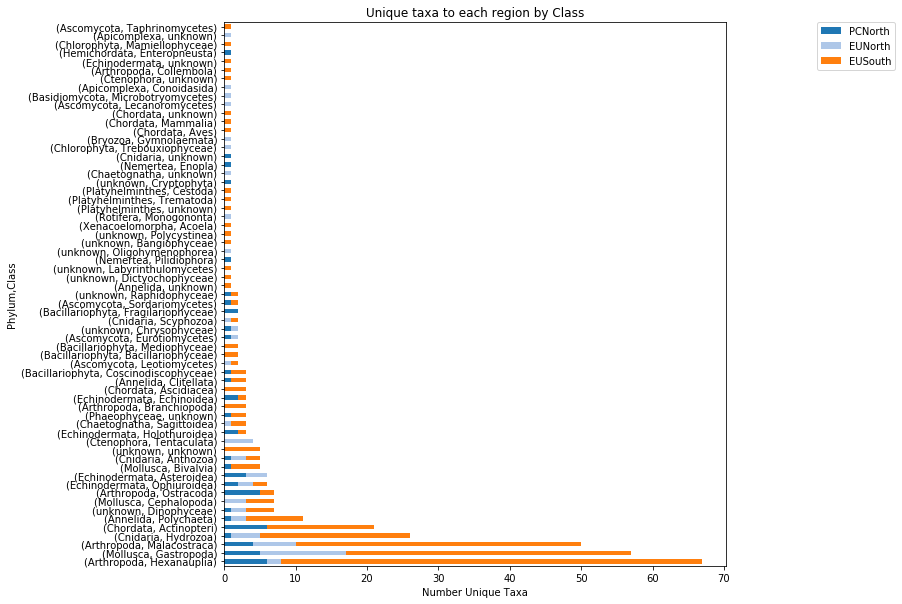

/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_COI_merged_taxa_unique_top20Class_byregion.pdf


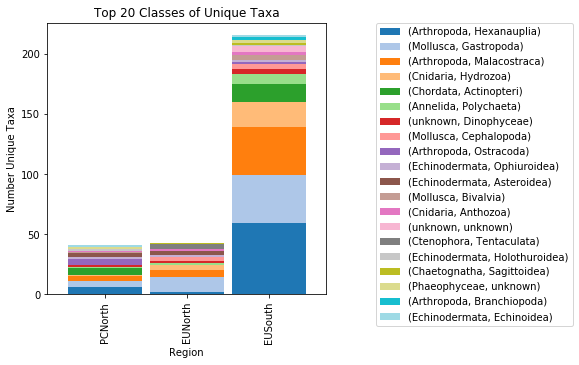

Phylum       Arthropoda   Mollusca   Arthropoda Cnidaria    Chordata  \
Class       Hexanauplia Gastropoda Malacostraca Hydrozoa Actinopteri   
Description                                                            
PCNorth               6          5            4        1           6   
EUNorth               2         12            6        4           0   
EUSouth              59         40           40       21          15   

Phylum        Annelida     unknown    Mollusca Arthropoda Echinodermata  \
Class       Polychaeta Dinophyceae Cephalopoda  Ostracoda   Ophiuroidea   
Description                                                               
PCNorth              1           1           0          5             2   
EUNorth              2           2           3          0             2   
EUSouth              8           4           4          2             2   

Phylum                 Mollusca Cnidaria unknown  Ctenophora Echinodermata  \
Class       Asteroidea Bivalvia Anthozoa unknown Tentaculata Holothuroidea   
Description                                                                  
PCNorth              3        1        1       0           0             2   
EUNorth              3        0        2       0           4             0   
EUSouth              0        4        2       5           0             1   

Phylum      Chaetognatha Phaeophyceae   Arthropoda Echinodermata  
Class        Sagittoidea      unknown Branchiopoda    Echinoidea  
Description                                                       
PCNorth                0            1            0             2  
EUNorth                1            0            0             0  
EUSouth                2            2            3             1

In [21]:
#by taxa / by phylum
#COI
df=raw_COI_filt.copy()
df=pd.concat([df,Ftaxa_COI_filt], axis=1, join='inner')
levels = list(Ftaxa_COI_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
df = df.groupby(levels).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
#df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
#df['Unique_region']=df.sum(axis=1)

for i in range(len(levels)):
    df[levels[i]]=df.index.str[i]
df=df.groupby(['Phylum','Class']).sum()

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df
#plot top 20
#df=df.head(n=20)
df=df.drop('tot', axis=1)
df=df[['PCNorth', 'EUNorth','EUSouth']]
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

df.plot(kind='barh', stacked=True, color=colors,figsize=(9,10), linewidth=.5)
plt.xlabel('Number Unique Taxa')
plt.title('Unique taxa to each region by Class')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_COI_merged_taxa_unique_Class.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()
df=df.head(n=20)
df=df.T
df.plot(kind='bar', stacked=True, color=colors,figsize=(5,5), linewidth=.5, width=0.9)
plt.ylabel('Number Unique Taxa')
plt.xlabel('Region')
plt.title('Top 20 Classes of Unique Taxa')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_COI_merged_taxa_unique_top20Class_byregion.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()


df

# Join together stats

In [22]:
df = pd.concat([df_otu_18S, df_taxa_18S, df_otu_COI, df_taxa_COI], keys=['OTU_18S', 'Taxa_18S','OTU_COI', 'Taxa_COI']
              ,axis=1)

#df=df.T
df.to_csv('/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_COI_Summary_Unique_OTUs_taxa_101719.csv')
df_unique = df.copy()
df


OTU_18S                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1           2018        2018         10163   
            2          UC2           1510        1510         10163   
            3          UC3           2420        6600         10163   
                       UC3_1         1810        6600         10163   
                       UC3_2         2334        6600         10163   
EUNorth     4          UC4           1571        1571         13027   
            5          UC5           3750        3750         13027   
            6          UC6           2565        2565         13027   
            7          UC7           2922        2922         13027   
            9          UC9           2078        2078         13027   
EUSouth     10         UC10          2280        2280         20940   
            12         UC12          2318        2318         20940   
            13         UC13          2348        2348         20940   
            14         UC14          2006        2006         20940   
            15         UC15          1648        1648         20940   
            16         GOC2a         1583        2110         20940   
                       GOC2b          504        2110         20940   
            23         CP23          2491        7919         20940   
                       CP23_1        3002        7919         20940   
                       CP23_2        2342        7919         20940   

                                 Taxa_18S                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1              3           3            31   
            2          UC2             10          10            31   
            3          UC3              2          15            31   
                       UC3_1            1          15            31   
                       UC3_2            4          15            31   
EUNorth     4          UC4              5           5            53   
            5          UC5              7           7            53   
            6          UC6             16          16            53   
            7          UC7              9           9            53   
            9          UC9              4           4            53   
EUSouth     10         UC10             7           7           127   
            12         UC12             1           1           127   
            13         UC13             7           7           127   
            14         UC14             8           8           127   
            15         UC15            16          16           127   
            16         GOC2a            6           9           127   
                       GOC2b            1           9           127   
            23         CP23             7          35           127   
                       CP23_1           7          35           127   
                       CP23_2           4          35           127   

                                  OTU_COI                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1            657         657          2776   
            2          UC2            443         443          2776   
            3          UC3            615        1603          2776   
                       UC3_1          232        1603          2776   
                       UC3_2          597        1603          2776   
EUNorth     4          UC4            384         384          4523   
            5          UC5           1697        1697          4523   
            6          UC6            430         430   

# Total OTUs

In [23]:
#18S
df=raw_18S_filt.copy()
print(len(df.index))
df=df.T
print(len(df.index))
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df= df_a.reset_index()
df = df.join(df_b, on='site_Order')
df = df.join(df_c, on='Description')
df=df.sort_values(['site_Order', 'index'])
df=df.set_index(['Description', 'site_Order', 'index'])
#Index of 100* (#sp A+B)/[#spA+B+#spuniqA + #spuniqB]
df_otu_18S=df.copy()
df

44837
21


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unique_samp  Unique_site  Unique_region
Description site_Order index                                          
PCNorth     1          UC1            2327         2327          10724
            2          UC2            1766         1766          10724
            3          UC3            2741         7015          10724
                       UC3_1          2079         7015          10724
                       UC3_2          2589         7015          10724
EUNorth     4          UC4            1792         1792          13676
            5          UC5            4329         4329          13676
            6          UC6            2800         2800          13676
            7          UC7            3436         3436          13676
            9          UC9            2242         2242          13676
EUSouth     10         UC10           2618         2618          21366
            12         UC12           2581         2581          21366
            13         UC13           2634         2634          21366
            14         UC14           2283         2283          21366
            15         UC15           1949         1949          21366
            16         GOC2a          1810         2376          21366
                       GOC2b           721         2376          21366
            23         CP23           2887         8332          21366
                       CP23_1         3371         8332          21366
                       CP23_2         2647         8332          21366

In [24]:
#by taxa / by phylum
#18S
df=raw_18S_filt.copy()
df=pd.concat([df,Ftaxa_18S_filt], axis=1, join='inner')
levels = list(Ftaxa_18S_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')

df = df.groupby(levels).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df= df_a.reset_index()
df = df.join(df_b, on='site_Order')
df = df.join(df_c, on='Description')
df=df.sort_values(['site_Order', 'index'])
df=df.set_index(['Description', 'site_Order', 'index'])
#Index of 100* (#sp A+B)/[#spA+B+#spuniqA + #spuniqB]
df
df_taxa_18S=df.copy()
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unique_samp  Unique_site  Unique_region
Description site_Order index                                          
PCNorth     1          UC1              64           64            167
            2          UC2              78           78            167
            3          UC3              95          132            167
                       UC3_1            86          132            167
                       UC3_2            98          132            167
EUNorth     4          UC4              79           79            216
            5          UC5             112          112            216
            6          UC6             107          107            216
            7          UC7             118          118            216
            9          UC9              72           72            216
EUSouth     10         UC10            104          104            282
            12         UC12             89           89            282
            13         UC13            119          119            282
            14         UC14            119          119            282
            15         UC15            123          123            282
            16         GOC2a           104          125            282
                       GOC2b            95          125            282
            23         CP23            122          174            282
                       CP23_1          135          174            282
                       CP23_2          117          174            282

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_merged_taxa_tot_Class_062619.pdf


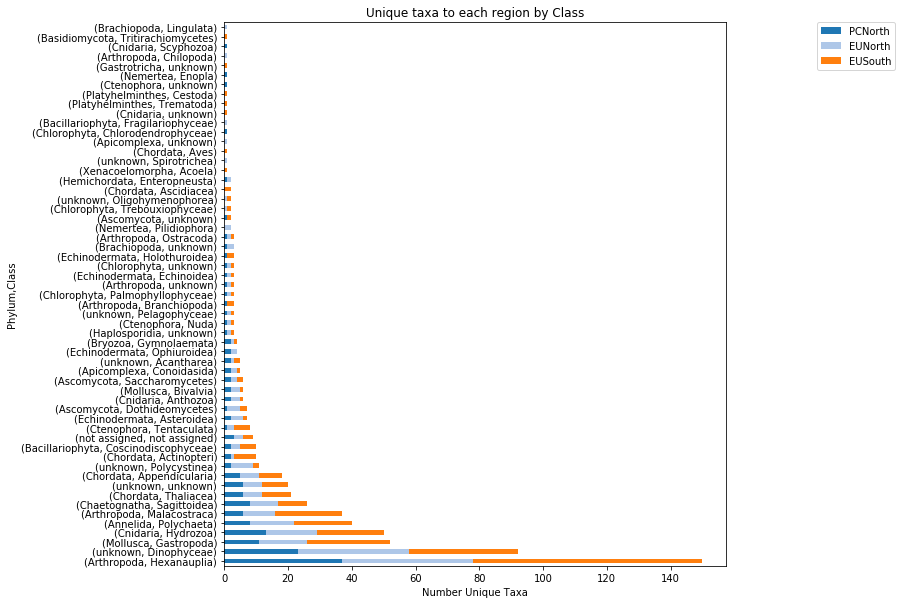

/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_merged_taxa_tot_top20Class_byregion_062619.pdf


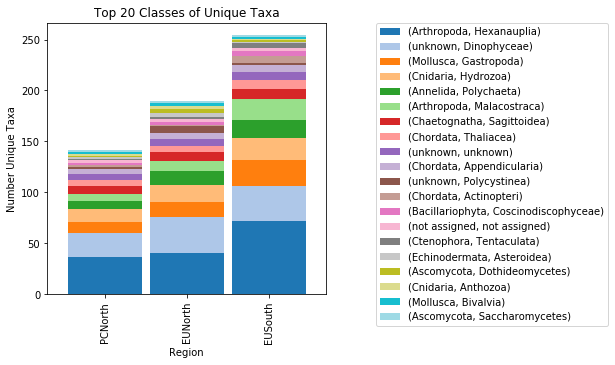

Phylum,Arthropoda,unknown,Mollusca,Cnidaria,Annelida,Arthropoda,Chaetognatha,Chordata,unknown,Chordata,unknown,Chordata,Bacillariophyta,not assigned,Ctenophora,Echinodermata,Ascomycota,Cnidaria,Mollusca,Ascomycota
Class,Hexanauplia,Dinophyceae,Gastropoda,Hydrozoa,Polychaeta,Malacostraca,Sagittoidea,Thaliacea,unknown,Appendicularia,Polycystinea,Actinopteri,Coscinodiscophyceae,not assigned,Tentaculata,Asteroidea,Dothideomycetes,Anthozoa,Bivalvia,Saccharomycetes
Description,,,,,,,,,,,,,,,,,,,,
PCNorth,37,23,11,13,8,6,8,6,6,5,2,2,2,3,1,2,1,2,2,2
EUNorth,41,35,15,16,14,10,9,6,6,6,7,1,3,3,2,4,4,3,3,2
EUSouth,72,34,26,21,18,21,9,9,8,7,2,7,5,3,5,1,2,1,1,2


In [25]:
#by taxa / by phylum
#18S
df=raw_18S_filt.copy()
df=pd.concat([df,Ftaxa_18S_filt], axis=1, join='inner')
levels = list(Ftaxa_18S_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
df = df.groupby(levels).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
#df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
#df['Unique_region']=df.sum(axis=1)

for i in range(len(levels)):
    df[levels[i]]=df.index.str[i]
df=df.groupby(['Phylum','Class']).sum()

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df
#plot top 20
#df=df.head(n=20)
df=df.drop('tot', axis=1)
df=df[['PCNorth', 'EUNorth','EUSouth']]
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

df.plot(kind='barh', stacked=True, color=colors,figsize=(9,10), linewidth=.5)
plt.xlabel('Number Unique Taxa')
plt.title('Unique taxa to each region by Class')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_18S_merged_taxa_tot_Class_062619.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

df=df.head(n=20)
df=df.T
df.plot(kind='bar', stacked=True, color=colors,figsize=(5,5), linewidth=.5, width=0.9)
plt.ylabel('Number Unique Taxa')
plt.xlabel('Region')
plt.title('Top 20 Classes of Unique Taxa')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_18S_merged_taxa_tot_top20Class_byregion_062619.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()


df

# COI

In [26]:
#COI
df=raw_COI_filt.copy()
print(len(df.index))
df=df.T
print(len(df.index))
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df= df_a.reset_index()
df = df.join(df_b, on='site_Order')
df = df.join(df_c, on='Description')
df=df.sort_values(['site_Order', 'index'])
df=df.set_index(['Description', 'site_Order', 'index'])
#Index of 100* (#sp A+B)/[#spA+B+#spuniqA + #spuniqB]
df_otu_COI=df.copy()
df

21402
21


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unique_samp  Unique_site  Unique_region
Description site_Order index                                          
PCNorth     1          UC1            1162         1162           3934
            2          UC2             994          994           3934
            3          UC3            1484         2442           3934
                       UC3_1           748         2442           3934
                       UC3_2          1045         2442           3934
EUNorth     4          UC4             725          725           5898
            5          UC5            2754         2754           5898
            6          UC6             845          845           5898
            7          UC7            1606         1606           5898
            9          UC9            1361         1361           5898
EUSouth     10         UC10           2130         2130          13405
            12         UC12           1439         1439          13405
            13         UC13           1789         1789          13405
            14         UC14           2478         2478          13405
            15         UC15           2576         2576          13405
            16         GOC2a          2532         4013          13405
                       GOC2b          2030         4013          13405
            23         CP23           1451         2623          13405
                       CP23_1         1357         2623          13405
                       CP23_2         1253         2623          13405

In [27]:
#by taxa / by phylum
#COI
df=raw_COI_filt.copy()
df=pd.concat([df,Ftaxa_COI_filt], axis=1, join='inner')
levels = list(Ftaxa_COI_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')

df = df.groupby(levels).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df= df_a.reset_index()
df = df.join(df_b, on='site_Order')
df = df.join(df_c, on='Description')
df=df.sort_values(['site_Order', 'index'])
df=df.set_index(['Description', 'site_Order', 'index'])
#Index of 100* (#sp A+B)/[#spA+B+#spuniqA + #spuniqB]
df
df_taxa_COI=df.copy()
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unique_samp  Unique_site  Unique_region
Description site_Order index                                          
PCNorth     1          UC1             131          131            278
            2          UC2             148          148            278
            3          UC3             178          218            278
                       UC3_1           131          218            278
                       UC3_2           154          218            278
EUNorth     4          UC4             145          145            335
            5          UC5             192          192            335
            6          UC6             152          152            335
            7          UC7             186          186            335
            9          UC9             120          120            335
EUSouth     10         UC10            210          210            502
            12         UC12            170          170            502
            13         UC13            206          206            502
            14         UC14            234          234            502
            15         UC15            239          239            502
            16         GOC2a           199          238            502
                       GOC2b           198          238            502
            23         CP23            232          278            502
                       CP23_1          210          278            502
                       CP23_2          193          278            502

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_COI_merged_taxa_tot_Class_062619.pdf


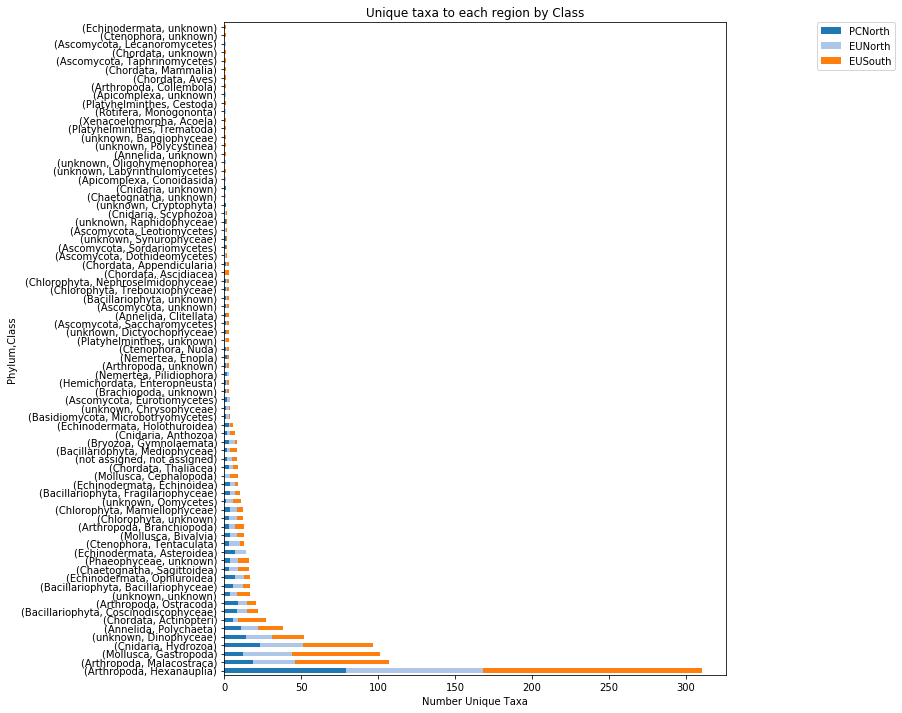

/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_COI_merged_taxa_tot_top20Class_byregion_062619.pdf


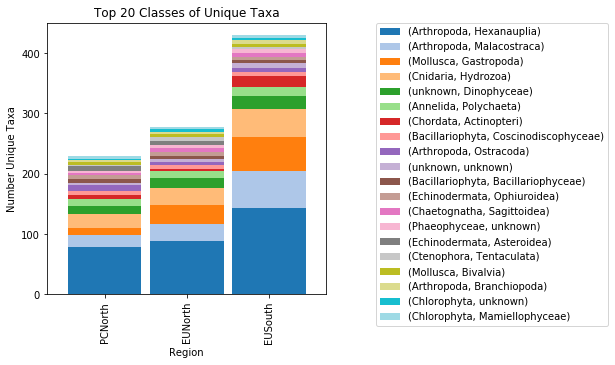

Phylum       Arthropoda                Mollusca Cnidaria     unknown  \
Class       Hexanauplia Malacostraca Gastropoda Hydrozoa Dinophyceae   
Description                                                            
PCNorth              79           19         12       23          14   
EUNorth              89           27         32       28          17   
EUSouth             143           61         57       46          21   

Phylum        Annelida    Chordata     Bacillariophyta Arthropoda unknown  \
Class       Polychaeta Actinopteri Coscinodiscophyceae  Ostracoda unknown   
Description                                                                 
PCNorth             11           6                   8          9       4   
EUNorth             11           3                   7          6       4   
EUSouth             16          18                   7          6       9   

Phylum        Bacillariophyta Echinodermata Chaetognatha Phaeophyceae  \
Class       Bacillariophyceae   Ophiuroidea  Sagittoidea      unknown   
Description                                                             
PCNorth                     6             7            3            4   
EUNorth                     6             6            6            5   
EUSouth                     5             4            7            7   

Phylum      Echinodermata  Ctenophora Mollusca   Arthropoda Chlorophyta  \
Class          Asteroidea Tentaculata Bivalvia Branchiopoda     unknown   
Description                                                               
PCNorth                 7           3        4            3           3   
EUNorth                 7           7        4            4           5   
EUSouth                 0           3        5            6           4   

Phylum                       
Class       Mamiellophyceae  
Description                  
PCNorth                   4  
EUNorth                   4  
EUSouth                   4

In [28]:
#by taxa / by phylum
#COI
df=raw_COI_filt.copy()
df=pd.concat([df,Ftaxa_COI_filt], axis=1, join='inner')
levels = list(Ftaxa_COI_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
df = df.groupby(levels).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are only unique to one sample
df_tot = df.copy()
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_samp']=df.sum(axis=1)
df_a=df[['Unique_samp']]
#want things that are uniqe to site_Order
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('site_Order').sum()
df=df.astype(bool).astype(int)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_site']=df.sum(axis=1)
df_b=df[['Unique_site']]
#want things that are uniqe to Region
df=df_tot.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
#df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
#df['Unique_region']=df.sum(axis=1)

for i in range(len(levels)):
    df[levels[i]]=df.index.str[i]
df=df.groupby(['Phylum','Class']).sum()

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df
#plot top 20
#df=df.head(n=20)
df=df.drop('tot', axis=1)
df=df[['PCNorth', 'EUNorth','EUSouth']]
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

df.plot(kind='barh', stacked=True, color=colors,figsize=(9,12), linewidth=.5)
plt.xlabel('Number Unique Taxa')
plt.title('Unique taxa to each region by Class')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_COI_merged_taxa_tot_Class_062619.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

df=df.head(n=20)
df=df.T
df.plot(kind='bar', stacked=True, color=colors,figsize=(5,5), linewidth=.5, width=0.9)
plt.ylabel('Number Unique Taxa')
plt.xlabel('Region')
plt.title('Top 20 Classes of Unique Taxa')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_COI_merged_taxa_tot_top20Class_byregion_062619.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()


df

In [29]:
df = pd.concat([df_otu_18S, df_taxa_18S, df_otu_COI, df_taxa_COI], keys=['OTU_18S', 'Taxa_18S','OTU_COI', 'Taxa_COI']
              ,axis=1)

#df=df.T
df.to_csv('/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_COI_Summary_Total_OTUs_taxa_101719.csv')
df_tot = df.copy()
df

OTU_18S                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1           2327        2327         10724   
            2          UC2           1766        1766         10724   
            3          UC3           2741        7015         10724   
                       UC3_1         2079        7015         10724   
                       UC3_2         2589        7015         10724   
EUNorth     4          UC4           1792        1792         13676   
            5          UC5           4329        4329         13676   
            6          UC6           2800        2800         13676   
            7          UC7           3436        3436         13676   
            9          UC9           2242        2242         13676   
EUSouth     10         UC10          2618        2618         21366   
            12         UC12          2581        2581         21366   
            13         UC13          2634        2634         21366   
            14         UC14          2283        2283         21366   
            15         UC15          1949        1949         21366   
            16         GOC2a         1810        2376         21366   
                       GOC2b          721        2376         21366   
            23         CP23          2887        8332         21366   
                       CP23_1        3371        8332         21366   
                       CP23_2        2647        8332         21366   

                                 Taxa_18S                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1             64          64           167   
            2          UC2             78          78           167   
            3          UC3             95         132           167   
                       UC3_1           86         132           167   
                       UC3_2           98         132           167   
EUNorth     4          UC4             79          79           216   
            5          UC5            112         112           216   
            6          UC6            107         107           216   
            7          UC7            118         118           216   
            9          UC9             72          72           216   
EUSouth     10         UC10           104         104           282   
            12         UC12            89          89           282   
            13         UC13           119         119           282   
            14         UC14           119         119           282   
            15         UC15           123         123           282   
            16         GOC2a          104         125           282   
                       GOC2b           95         125           282   
            23         CP23           122         174           282   
                       CP23_1         135         174           282   
                       CP23_2         117         174           282   

                                  OTU_COI                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1           1162        1162          3934   
            2          UC2            994         994          3934   
            3          UC3           1484        2442          3934   
                       UC3_1          748        2442          3934   
                       UC3_2         1045        2442          3934   
EUNorth     4          UC4            725         725          5898   
            5          UC5           2754        2754          5898   
            6          UC6            845         845   

In [30]:
#compare total and unique
#get percent unique
df = df_unique/df_tot *100
df=df.round(1)
df



OTU_18S                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1           86.7        86.7          94.8   
            2          UC2           85.5        85.5          94.8   
            3          UC3           88.3        94.1          94.8   
                       UC3_1         87.1        94.1          94.8   
                       UC3_2         90.2        94.1          94.8   
EUNorth     4          UC4           87.7        87.7          95.3   
            5          UC5           86.6        86.6          95.3   
            6          UC6           91.6        91.6          95.3   
            7          UC7           85.0        85.0          95.3   
            9          UC9           92.7        92.7          95.3   
EUSouth     10         UC10          87.1        87.1          98.0   
            12         UC12          89.8        89.8          98.0   
            13         UC13          89.1        89.1          98.0   
            14         UC14          87.9        87.9          98.0   
            15         UC15          84.6        84.6          98.0   
            16         GOC2a         87.5        88.8          98.0   
                       GOC2b         69.9        88.8          98.0   
            23         CP23          86.3        95.0          98.0   
                       CP23_1        89.1        95.0          98.0   
                       CP23_2        88.5        95.0          98.0   

                                 Taxa_18S                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1            4.7         4.7          18.6   
            2          UC2           12.8        12.8          18.6   
            3          UC3            2.1        11.4          18.6   
                       UC3_1          1.2        11.4          18.6   
                       UC3_2          4.1        11.4          18.6   
EUNorth     4          UC4            6.3         6.3          24.5   
            5          UC5            6.2         6.2          24.5   
            6          UC6           15.0        15.0          24.5   
            7          UC7            7.6         7.6          24.5   
            9          UC9            5.6         5.6          24.5   
EUSouth     10         UC10           6.7         6.7          45.0   
            12         UC12           1.1         1.1          45.0   
            13         UC13           5.9         5.9          45.0   
            14         UC14           6.7         6.7          45.0   
            15         UC15          13.0        13.0          45.0   
            16         GOC2a          5.8         7.2          45.0   
                       GOC2b          1.1         7.2          45.0   
            23         CP23           5.7        20.1          45.0   
                       CP23_1         5.2        20.1          45.0   
                       CP23_2         3.4        20.1          45.0   

                                  OTU_COI                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1           56.5        56.5          70.6   
            2          UC2           44.6        44.6          70.6   
            3          UC3           41.4        65.6          70.6   
                       UC3_1         31.0        65.6          70.6   
                       UC3_2         57.1        65.6          70.6   
EUNorth     4          UC4           53.0        53.0          76.7   
            5          UC5           61.6        61.6          76.7   
            6          UC6           50.9        50.9   

In [31]:
#compare total and unique
#Data into S4 Table
#get percent unique
df = df_unique.div(df_tot) *100
df=df.round(1)
df.to_csv('/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_COI_Summary_PercentUniqueOTUsTaxa_101919.csv')
df


OTU_18S                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1           86.7        86.7          94.8   
            2          UC2           85.5        85.5          94.8   
            3          UC3           88.3        94.1          94.8   
                       UC3_1         87.1        94.1          94.8   
                       UC3_2         90.2        94.1          94.8   
EUNorth     4          UC4           87.7        87.7          95.3   
            5          UC5           86.6        86.6          95.3   
            6          UC6           91.6        91.6          95.3   
            7          UC7           85.0        85.0          95.3   
            9          UC9           92.7        92.7          95.3   
EUSouth     10         UC10          87.1        87.1          98.0   
            12         UC12          89.8        89.8          98.0   
            13         UC13          89.1        89.1          98.0   
            14         UC14          87.9        87.9          98.0   
            15         UC15          84.6        84.6          98.0   
            16         GOC2a         87.5        88.8          98.0   
                       GOC2b         69.9        88.8          98.0   
            23         CP23          86.3        95.0          98.0   
                       CP23_1        89.1        95.0          98.0   
                       CP23_2        88.5        95.0          98.0   

                                 Taxa_18S                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1            4.7         4.7          18.6   
            2          UC2           12.8        12.8          18.6   
            3          UC3            2.1        11.4          18.6   
                       UC3_1          1.2        11.4          18.6   
                       UC3_2          4.1        11.4          18.6   
EUNorth     4          UC4            6.3         6.3          24.5   
            5          UC5            6.2         6.2          24.5   
            6          UC6           15.0        15.0          24.5   
            7          UC7            7.6         7.6          24.5   
            9          UC9            5.6         5.6          24.5   
EUSouth     10         UC10           6.7         6.7          45.0   
            12         UC12           1.1         1.1          45.0   
            13         UC13           5.9         5.9          45.0   
            14         UC14           6.7         6.7          45.0   
            15         UC15          13.0        13.0          45.0   
            16         GOC2a          5.8         7.2          45.0   
                       GOC2b          1.1         7.2          45.0   
            23         CP23           5.7        20.1          45.0   
                       CP23_1         5.2        20.1          45.0   
                       CP23_2         3.4        20.1          45.0   

                                  OTU_COI                            \
                              Unique_samp Unique_site Unique_region   
Description site_Order index                                          
PCNorth     1          UC1           56.5        56.5          70.6   
            2          UC2           44.6        44.6          70.6   
            3          UC3           41.4        65.6          70.6   
                       UC3_1         31.0        65.6          70.6   
                       UC3_2         57.1        65.6          70.6   
EUNorth     4          UC4           53.0        53.0          76.7   
            5          UC5           61.6        61.6          76.7   
            6          UC6           50.9        50.9   

# Look at taxa/otus that are present in at least two sites, then unique to region

In [32]:
#18S
df=raw_18S_filt.copy()
print(len(df.index))
df=df.T
print(len(df.index))
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
#want things that are uniqe to Region
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df=df.astype(bool).astype(int)
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df_otu_18S=df.copy()
df[['Unique_region']]

44837
21


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Unique_region
Description,
EUNorth,141
EUSouth,418
PCNorth,71


In [33]:
#by taxa / by phylum
#18S
df=raw_18S_filt.copy()
df=pd.concat([df,Ftaxa_18S_filt], axis=1, join='inner')
levels = list(Ftaxa_18S_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
#df=df.loc[df['Genus']!='unknown']
#df=df.loc[df['Species']!='unknown']
#df=df.loc[df['Family']!='unknown']
print(levels)
group= ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = df.groupby(group).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]

df_taxa_18S=df.copy()
print(df[['Unique_region']])
df.T


['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
             Unique_region
Description               
EUNorth                 12
EUSouth                 63
PCNorth                 11


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Description,EUNorth,EUSouth,PCNorth
"(Eukaryota, Annelida, Polychaeta, Echiuroinea, Echiuridae, unknown, unknown)",0,0,1
"(Eukaryota, Annelida, Polychaeta, Eunicida, Amphinomidae, unknown, unknown)",1,0,0
"(Eukaryota, Annelida, Polychaeta, Phyllodocida, Polynoidae, unknown, unknown)",0,0,1
"(Eukaryota, Annelida, Polychaeta, Phyllodocida, Typhloscolecidae, Typhloscolex, Typhloscolex sp. THS-2009)",0,1,0
"(Eukaryota, Annelida, Polychaeta, Phyllodocida, Typhloscolecidae, Typhloscolex, unknown)",0,1,0
"(Eukaryota, Annelida, Polychaeta, Spionida, Chaetopteridae, Phyllochaetopterus, unknown)",1,0,0
"(Eukaryota, Annelida, Polychaeta, Spionida, Spionidae, Malacoceros, Malacoceros indicus)",0,1,0
"(Eukaryota, Annelida, Polychaeta, unknown, unknown, unknown, unknown)",0,1,0
"(Eukaryota, Arthropoda, Branchiopoda, Diplostraca, Sididae, Penilia, unknown)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Acartiidae, Acartia, Acartia negligens)",0,1,0


['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_merged_taxa_unique_Class_2detect.pdf


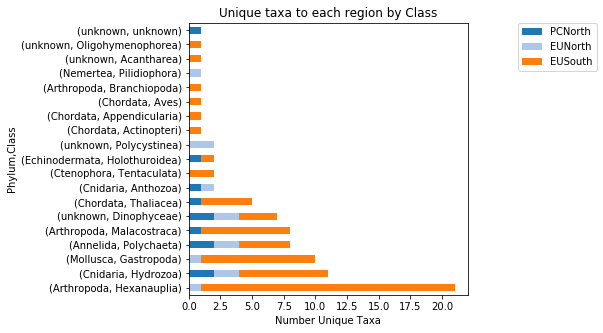

/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_merged_taxa_unique_top20Class_byregion_2detect.pdf


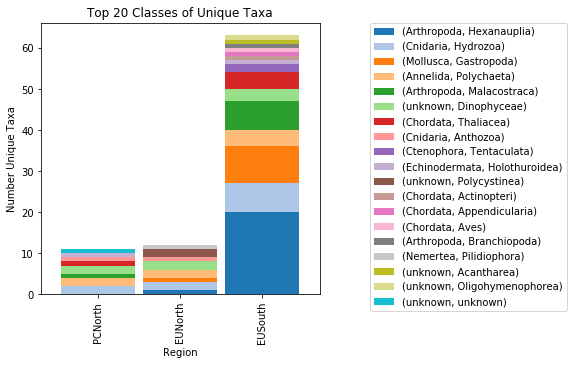

Phylum       Arthropoda Cnidaria   Mollusca   Annelida   Arthropoda  \
Class       Hexanauplia Hydrozoa Gastropoda Polychaeta Malacostraca   
Description                                                           
PCNorth               0        2          0          2            1   
EUNorth               1        2          1          2            0   
EUSouth              20        7          9          4            7   

Phylum          unknown  Chordata Cnidaria  Ctenophora Echinodermata  \
Class       Dinophyceae Thaliacea Anthozoa Tentaculata Holothuroidea   
Description                                                            
PCNorth               2         1        1           0             1   
EUNorth               2         0        1           0             0   
EUSouth               3         4        0           2             1   

Phylum           unknown    Chordata                       Arthropoda  \
Class       Polycystinea Actinopteri Appendicularia Aves Branchiopoda   
Description                                                             
PCNorth                0           0              0    0            0   
EUNorth                2           0              0    0            0   
EUSouth                0           1              1    1            1   

Phylum          Nemertea    unknown                            
Class       Pilidiophora Acantharea Oligohymenophorea unknown  
Description                                                    
PCNorth                0          0                 0       1  
EUNorth                1          0                 0       0  
EUSouth                0          1                 1       0

In [34]:
#by taxa / by phylum
#18S
#by taxa / by phylum
#18S
df=raw_18S_filt.copy()
df=pd.concat([df,Ftaxa_18S_filt], axis=1, join='inner')
levels = list(Ftaxa_18S_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
#df=df.loc[df['Genus']!='unknown']
#df=df.loc[df['Species']!='unknown']
#df=df.loc[df['Family']!='unknown']
print(levels)
group= ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = df.groupby(group).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)


for i in range(len(group)):
    df[group[i]]=df.index.str[i]
df=df.groupby(['Phylum','Class']).sum()

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df
#plot top 20
#df=df.head(n=20)
df=df.drop('tot', axis=1)
df=df[['PCNorth', 'EUNorth','EUSouth']]
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

df.plot(kind='barh', stacked=True, color=colors,figsize=(5,5), linewidth=.5)
plt.xlabel('Number Unique Taxa')
plt.title('Unique taxa to each region by Class')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_18S_merged_taxa_unique_Class_2detect.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

df=df.head(n=20)
df=df.T
df.plot(kind='bar', stacked=True, color=colors,figsize=(5,5), linewidth=.5, width=0.9)
plt.ylabel('Number Unique Taxa')
plt.xlabel('Region')
plt.title('Top 20 Classes of Unique Taxa')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_18S_merged_taxa_unique_top20Class_byregion_2detect.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()


df

['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_merged_taxa_unique_Class_2detect_north.pdf


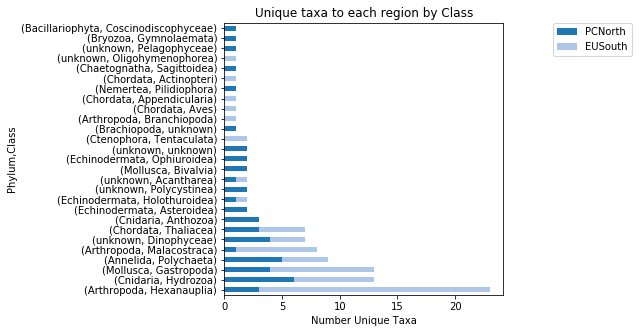

/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_18S_merged_taxa_unique_top20Class_byregion_2detect_north.pdf


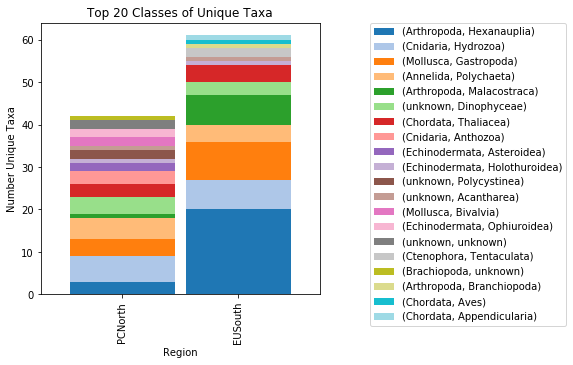

Phylum       Arthropoda Cnidaria   Mollusca   Annelida   Arthropoda  \
Class       Hexanauplia Hydrozoa Gastropoda Polychaeta Malacostraca   
Description                                                           
PCNorth               3        6          4          5            1   
EUSouth              20        7          9          4            7   

Phylum          unknown  Chordata Cnidaria Echinodermata                \
Class       Dinophyceae Thaliacea Anthozoa    Asteroidea Holothuroidea   
Description                                                              
PCNorth               4         3        3             2             1   
EUSouth               3         4        0             0             1   

Phylum           unknown            Mollusca Echinodermata unknown  \
Class       Polycystinea Acantharea Bivalvia   Ophiuroidea unknown   
Description                                                          
PCNorth                2          1        2             2       2   
EUSouth                0          1        0             0       0   

Phylum       Ctenophora Brachiopoda   Arthropoda Chordata                 
Class       Tentaculata     unknown Branchiopoda     Aves Appendicularia  
Description                                                               
PCNorth               0           1            0        0              0  
EUSouth               2           0            1        1              1

In [35]:
# Join PCNorth and EUNorth
#by taxa / by phylum
#18S
df=raw_18S_filt.copy()
df=pd.concat([df,Ftaxa_18S_filt], axis=1, join='inner')
levels = list(Ftaxa_18S_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
#df=df.loc[df['Genus']!='unknown']
#df=df.loc[df['Species']!='unknown']
#df=df.loc[df['Family']!='unknown']
print(levels)
group= ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = df.groupby(group).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
#Merge EUnorth and PCNorth
df['Description'] = df['Description'].replace('EUNorth','PCNorth')
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)


for i in range(len(group)):
    df[group[i]]=df.index.str[i]
df=df.groupby(['Phylum','Class']).sum()

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df
#plot top 20
#df=df.head(n=20)
df=df.drop('tot', axis=1)
df=df[['PCNorth','EUSouth']]
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

df.plot(kind='barh', stacked=True, color=colors,figsize=(5,5), linewidth=.5)
plt.xlabel('Number Unique Taxa')
plt.title('Unique taxa to each region by Class')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_18S_merged_taxa_unique_Class_2detect_north.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

df=df.head(n=20)
df=df.T
df.plot(kind='bar', stacked=True, color=colors,figsize=(5,5), linewidth=.5, width=0.9)
plt.ylabel('Number Unique Taxa')
plt.xlabel('Region')
plt.title('Top 20 Classes of Unique Taxa')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_18S_merged_taxa_unique_top20Class_byregion_2detect_north.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()


df

# COI

In [36]:
#COI
df=raw_COI_filt.copy()
print(len(df.index))
df=df.T
print(len(df.index))
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
#want things that are uniqe to Region
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df=df.astype(bool).astype(int)
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df_otu_COI=df.copy()
df[['Unique_region']]

21402
21


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Unique_region
Description,
EUNorth,239
EUSouth,1828
PCNorth,232


In [37]:
#by taxa / by phylum
#COI
df=raw_COI_filt.copy()
df=pd.concat([df,Ftaxa_COI_filt], axis=1, join='inner')
levels = list(Ftaxa_COI_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
#df=df.loc[df['Genus']!='unknown']
df=df.loc[df['Species']!='unknown']
#df=df.loc[df['Family']!='unknown']
print(levels)
group= ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = df.groupby(group).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]

df_taxa_COI=df.copy()
print(df[['Unique_region']])
df.T


['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
             Unique_region
Description               
EUNorth                  6
EUSouth                 58
PCNorth                  9


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Description,EUNorth,EUSouth,PCNorth
"(Eukaryota, Arthropoda, Branchiopoda, Diplostraca, Podonidae, Evadne, Evadne spinifera)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calanidae, Canthocalanus, Canthocalanus pauper)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calanidae, Mesocalanus, Mesocalanus tenuicornis)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calanidae, Undinula, Undinula vulgaris)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calocalanidae, Calocalanus, Calocalanus minutus)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calocalanidae, Calocalanus, Calocalanus pavo)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calocalanidae, Calocalanus, Calocalanus plumulosus)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calocalanidae, Calocalanus, Calocalanus styliremis)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Candaciidae, Candacia, Candacia curta)",0,1,0
"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Candaciidae, Candacia, Candacia truncata)",0,1,0


['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_COI_merged_taxa_unique_Class_2detect.pdf


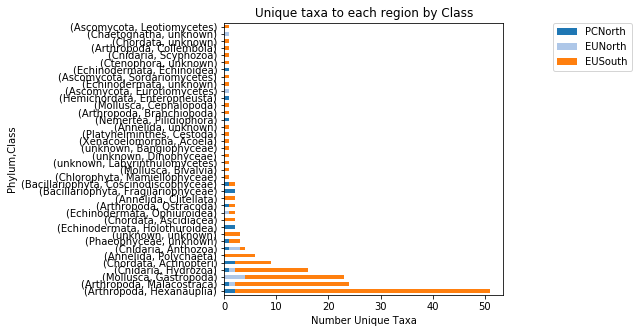

/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_COI_merged_taxa_unique_top20Class_byregion_2detect.pdf


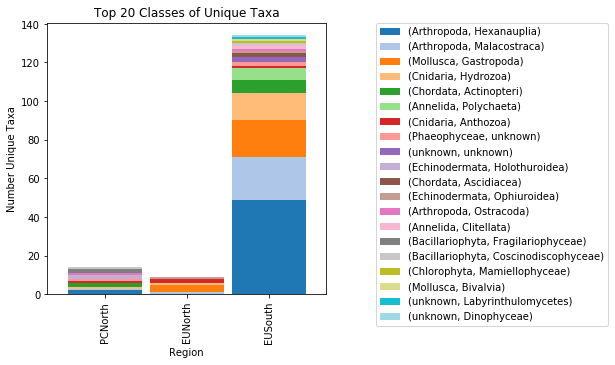

Phylum       Arthropoda                Mollusca Cnidaria    Chordata  \
Class       Hexanauplia Malacostraca Gastropoda Hydrozoa Actinopteri   
Description                                                            
PCNorth               2            1          0        1           2   
EUNorth               0            1          4        1           0   
EUSouth              49           22         19       14           7   

Phylum        Annelida Cnidaria Phaeophyceae unknown Echinodermata   Chordata  \
Class       Polychaeta Anthozoa      unknown unknown Holothuroidea Ascidiacea   
Description                                                                     
PCNorth              0        1            1       0             2          0   
EUNorth              0        2            0       0             0          0   
EUSouth              6        1            2       3             0          2   

Phylum      Echinodermata Arthropoda   Annelida   Bacillariophyta  \
Class         Ophiuroidea  Ostracoda Clitellata Fragilariophyceae   
Description                                                         
PCNorth                 0          1          0                 2   
EUNorth                 1          0          0                 0   
EUSouth                 1          1          2                 0   

Phylum                              Chlorophyta Mollusca             unknown  \
Class       Coscinodiscophyceae Mamiellophyceae Bivalvia Labyrinthulomycetes   
Description                                                                    
PCNorth                       1               0        0                   0   
EUNorth                       0               0        0                   0   
EUSouth                       1               1        1                   1   

Phylum                   
Class       Dinophyceae  
Description              
PCNorth               0  
EUNorth               0  
EUSouth               1

In [38]:
#by taxa / by phylum
#COI
#by taxa / by phylum
#COI
df=raw_COI_filt.copy()
df=pd.concat([df,Ftaxa_COI_filt], axis=1, join='inner')
levels = list(Ftaxa_COI_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
#df=df.loc[df['Genus']!='unknown']
#df=df.loc[df['Species']!='unknown']
#df=df.loc[df['Family']!='unknown']
print(levels)
group= ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = df.groupby(group).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)


for i in range(len(group)):
    df[group[i]]=df.index.str[i]
df=df.groupby(['Phylum','Class']).sum()

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df
#plot top 20
#df=df.head(n=20)
df=df.drop('tot', axis=1)
df=df[['PCNorth', 'EUNorth','EUSouth']]
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

df.plot(kind='barh', stacked=True, color=colors,figsize=(5,5), linewidth=.5)
plt.xlabel('Number Unique Taxa')
plt.title('Unique taxa to each region by Class')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_COI_merged_taxa_unique_Class_2detect.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

df=df.head(n=20)
df=df.T
df.plot(kind='bar', stacked=True, color=colors,figsize=(5,5), linewidth=.5, width=0.9)
plt.ylabel('Number Unique Taxa')
plt.xlabel('Region')
plt.title('Top 20 Classes of Unique Taxa')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_COI_merged_taxa_unique_top20Class_byregion_2detect.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()


df

['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_COI_merged_taxa_unique_Class_2detect_north.pdf


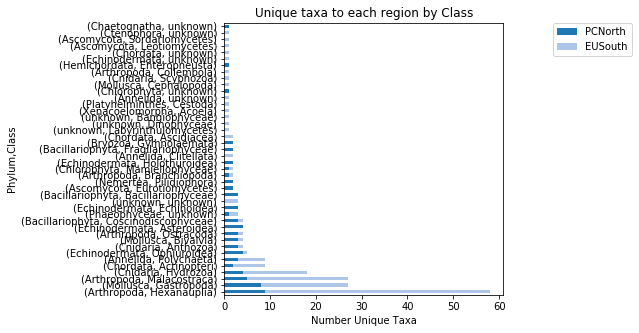

/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/GOC_COI_merged_taxa_unique_top20Class_byregion_2detect_north.pdf


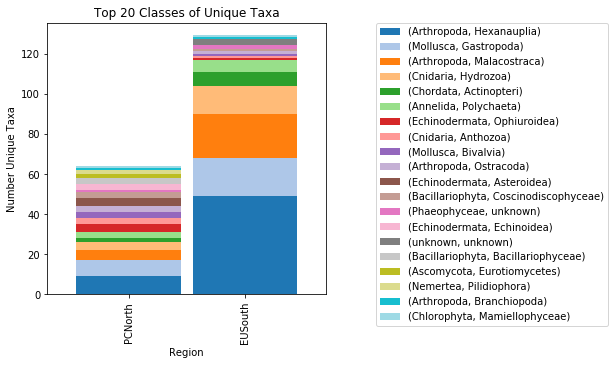

Phylum,Arthropoda,Mollusca,Arthropoda,Cnidaria,Chordata,Annelida,Echinodermata,Cnidaria,Mollusca,Arthropoda,Echinodermata,Bacillariophyta,Phaeophyceae,Echinodermata,unknown,Bacillariophyta,Ascomycota,Nemertea,Arthropoda,Chlorophyta
Class,Hexanauplia,Gastropoda,Malacostraca,Hydrozoa,Actinopteri,Polychaeta,Ophiuroidea,Anthozoa,Bivalvia,Ostracoda,Asteroidea,Coscinodiscophyceae,unknown,Echinoidea,unknown,Bacillariophyceae,Eurotiomycetes,Pilidiophora,Branchiopoda,Mamiellophyceae
Description,,,,,,,,,,,,,,,,,,,,
PCNorth,9,8,5,4,2,3,4,3,3,3,4,3,1,3,0,3,2,2,1,1
EUSouth,49,19,22,14,7,6,1,1,1,1,0,1,2,0,3,0,0,0,1,1


In [39]:
# Join PCNorth and EUNorth
#by taxa / by phylum
#COI
df=raw_COI_filt.copy()
df=pd.concat([df,Ftaxa_COI_filt], axis=1, join='inner')
levels = list(Ftaxa_COI_filt)
df['Species'] = df['Species'].replace('s_','unknown')
df['Genus'] = df['Genus'].replace('g_','unknown')
df['Family'] = df['Family'].replace('f_','unknown')
df['Order'] = df['Order'].replace('o_','unknown')
df['Class'] = df['Class'].replace('c_','unknown')
df['Phylum'] = df['Phylum'].replace('p_','unknown')
df['Kingdom'] = df['Kingdom'].replace('k_','unknown')
#df=df.loc[df['Genus']!='unknown']
#df=df.loc[df['Species']!='unknown']
#df=df.loc[df['Family']!='unknown']
print(levels)
group= ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = df.groupby(group).sum()
df=df.T
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
#Merge EUnorth and PCNorth
df['Description'] = df['Description'].replace('EUNorth','PCNorth')
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
df=df.astype(bool).astype(int)
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)


for i in range(len(group)):
    df[group[i]]=df.index.str[i]
df=df.groupby(['Phylum','Class']).sum()

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df
#plot top 20
#df=df.head(n=20)
df=df.drop('tot', axis=1)
df=df[['PCNorth','EUSouth']]
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

df.plot(kind='barh', stacked=True, color=colors,figsize=(5,5), linewidth=.5)
plt.xlabel('Number Unique Taxa')
plt.title('Unique taxa to each region by Class')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_COI_merged_taxa_unique_Class_2detect_north.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

df=df.head(n=20)
df=df.T
df.plot(kind='bar', stacked=True, color=colors,figsize=(5,5), linewidth=.5, width=0.9)
plt.ylabel('Number Unique Taxa')
plt.xlabel('Region')
plt.title('Top 20 Classes of Unique Taxa')
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
filename='/Users/kpitz/Projects/Gulf_of_California/Unique_taxa/' +'GOC_COI_merged_taxa_unique_top20Class_byregion_2detect_north.pdf'
print(filename)
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()


df

In [40]:
#Join north regions OTU
#COI
df=raw_COI_filt.copy()
print(len(df.index))
df=df.T
print(len(df.index))
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
#Merge EUnorth and PCNorth
df['Description'] = df['Description'].replace('EUNorth','PCNorth')
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
#want things that are uniqe to Region
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df=df.astype(bool).astype(int)
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df_otu_COI=df.copy()
df[['Unique_region']]

21402
21


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Unique_region
Description,
EUSouth,1828
PCNorth,1169


In [41]:
#Join north regions OTU
#18S
df=raw_18S_filt.copy()
print(len(df.index))
df=df.T
print(len(df.index))
df=pd.concat([df,meta_dat[['Description', 'site_Order']]], axis=1, join='inner')
df['site_Order'] = df['site_Order'].replace(17,16)
#Merge EUnorth and PCNorth
df['Description'] = df['Description'].replace('EUNorth','PCNorth')
df=df.loc[df['Description']!='0']
df.reset_index(inplace=True)
df=df.set_index(['Description', 'site_Order', 'index'])
df=df.astype(bool).astype(int)
#want things that are present in at least 2 samples
df=df.T
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']>1]
#df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
df_tot = df.copy()
#want things that are uniqe to Region
df.reset_index(inplace=True)
df=df.groupby('Description').sum()
#df.drop('site_Order', axis=1, inplace=True)
df=df.T
df=df.astype(bool).astype(int)
df['Total']=df.sum(axis=1)
df=df.loc[df['Total']==1]
df=df.drop('Total', axis=1)
df=df.T
#df=df.groupby(['Description', 'site_Order']).sum()
df['Unique_region']=df.sum(axis=1)
df_c=df[['Unique_region']]
df_otu_18S=df.copy()
df[['Unique_region']]

44837
21


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Unique_region
Description,
EUSouth,418
PCNorth,493
